In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Exploration of Data
In this section we will explore some fundamental questions about the data we are analyzing. These questions include explorations such as:
1. What teams have won most of their games and which ones have lost most of their games?
2. Do teams that win more often have higher numbers of field goal attempts?
3. Do teams more often than not win Home games?

The first thing we will do to set up exploration is to load the dataframes that we have cleaned from the previous section.

In [2]:
teams = pd.read_pickle("teams")
teams["Team_Name"] = teams.Team_Name.astype("category")

past_season_data = pd.read_pickle("past_season_detailed_results")
past_season_data_cols = ["Season", "Daynum", "Wteam", "Wscore", "Lteam", "Lscore", "Wloc", "Numot", "Wfgm", "Wfga", 
                         "Wfgm3", "Wfga3", "Wftm", "Wfta", "Wor", "Wdr", "Wast", "Wto", "Wstl", "Wblk", "Wpf", "Lfgm", 
                         "Lfga", "Lfgm3", "Lfga3", "Lftm", "Lfta", "Lor", "Ldr", "Last", "Lto", "Lstl", "Lblk", "Lpf"]

past_tourney_data = pd.read_pickle("past_tourney_detailed_results")
past_tourney_data_cols = past_season_data_cols

In [3]:
teams.head()

,Team_Name
Team_Id,
1101,Abilene Chr
1102,Air Force
1103,Akron
1104,Alabama
1105,Alabama A&M


In [4]:
assert len(teams) == 364
assert len(teams.columns) == 1
assert teams.columns == ["Team_Name"]
assert teams.index.name == "Team_Id"
assert teams.Team_Name.dtype.name == "category"

In [5]:
past_season_data.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [6]:
assert len(past_season_data) == 65872
assert len(past_season_data.columns) == 34
assert list(past_season_data.columns) == past_season_data_cols

In [7]:
past_tourney_data.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [8]:
assert len(past_tourney_data) == 847
assert len(past_tourney_data.columns) == 34
assert list(past_tourney_data.columns) == past_tourney_data_cols

## 1. Win Percentage of Total Games Played
In this section we wil examine our first question - Of all the games a team has played, do they win a majority of their games?

Here we join the game data from past regular seasons and past tournaments together to create one giant dataset.

In [9]:
joined_game_data = pd.concat([past_season_data, past_tourney_data])
joined_game_data["Game_Id"] = [i for i in range(len(joined_game_data))]
joined_game_data.set_index("Game_Id", inplace=True)

In [10]:
assert len(joined_game_data) == 66719
assert joined_game_data.index.name == "Game_Id"
assert list(joined_game_data.columns) == past_season_data_cols

The next thing we do is store the games won by a team in a DataFrame and store the games lost by a team in another DataFrame.

In [11]:
won_games = joined_game_data.groupby("Wteam")
lost_games = joined_game_data.groupby("Lteam")
total_games = won_games.count() + lost_games.count()

In [12]:
assert len(won_games) == len(lost_games) == len(total_games) == 355

Finally we will calculate the win percentage of the total number of games that each team has played from 2003-2015 and store that in a DataFrame.

In [13]:
win_percent = (won_games.count() / total_games)["Season"].reset_index()
win_percent.rename(columns={"Wteam": "Team_Id", "Season": "Total_Win_Percent"}, inplace=True)
win_percent.set_index("Team_Id", inplace=True)

In [14]:
win_percent.head()

,Total_Win_Percent
Team_Id,
1101,0.183673
1102,0.504043
1103,0.648058
1104,0.584352
1105,0.358601


In [15]:
assert len(win_percent) == 355
assert win_percent.index.name == "Team_Id"
assert list(win_percent.columns) == ["Total_Win_Percent"]

### Plot The Data
In this section we will explore different plots of this data to see the distribution of winning of all the teams and which teams are winning most of their games.

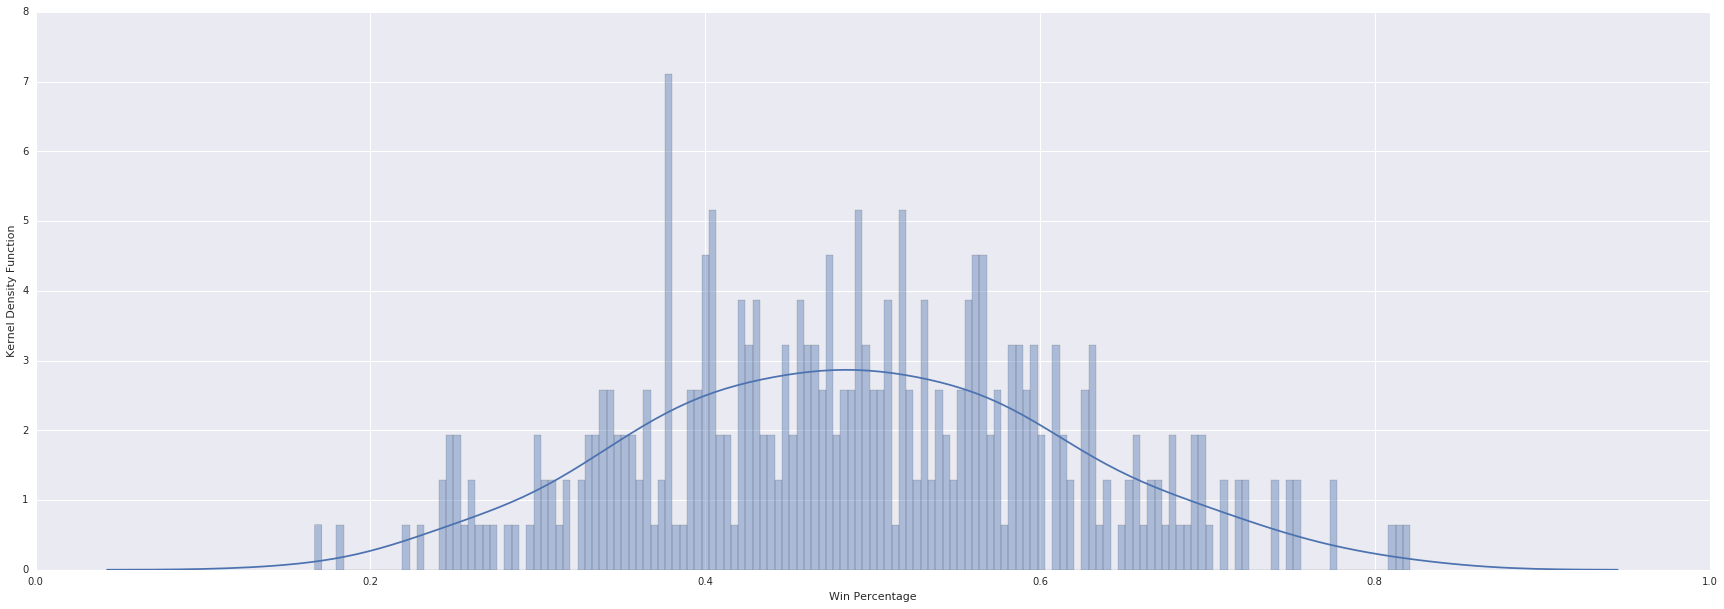

In [16]:
plt.figure(figsize=(30, 10))
sns.distplot(win_percent["Total_Win_Percent"], bins=150)
plt.xlabel("Win Percentage")
plt.ylabel("Kernel Density Function");

From the data and plot above it is pretty interesting to see that the win percentage of NCAA D1 teams is pretty much normally distributed.

Next lets examine the extremes of our data and see which teams are winning most of the their games and which aren't.

### Plot Extremes
In this section we will explore the extremes of our win percentage data. Let's first join the Team Name to the Win Percentage table so that we can examine teams more easily.

In [17]:
win_percent = win_percent.join(teams)

In [18]:
win_percent.head()

,Total_Win_Percent,Team_Name
Team_Id,,
1101,0.183673,Abilene Chr
1102,0.504043,Air Force
1103,0.648058,Akron
1104,0.584352,Alabama
1105,0.358601,Alabama A&M


Reset the index to **Team_Name** to easily examine the data.

In [19]:
win_percent = win_percent.reset_index().set_index("Team_Name")

Define a function that we can pass to **interact** so that we can examine our data.

In [20]:
def plot_wp_extremes(num_teams, ascending):
    sorted_wp = win_percent.sort_values(["Total_Win_Percent"], ascending=ascending)
    plt.figure(figsize=(20, 10))
    sorted_wp["Total_Win_Percent"][:num_teams].plot(kind="barh")
    plt.xlabel("Win Percentage")
    plt.ylabel("Team Name")

In [21]:
interact(plot_wp_extremes, num_teams=(1, 50), ascending=True, __manual=True)

<function __main__.plot_wp_extremes>

Through examination of this plot we can see that **Duke** has a very heigh overall win percentage. They win almost all of their games! While **Morris Brown** wins almost none of their games!

In [22]:
print("HI Win Percentage: " + str(win_percent.loc["Duke"]["Total_Win_Percent"]) + ", Duke")
print("LO Win Percentage: " + str(win_percent.loc["Morris Brown"]["Total_Win_Percent"]) + ", Morris Brown")

HI Win Percentage: 0.821120689655, Duke
LO Win Percentage: 0.166666666667, Morris Brown


## 2. Correlation Between Field Goal Attempts and Winning
In this section we will examine our second question - Do teams with higher numbers of field goal attempts win more of their games?

The first thing we will do is compute the sum of the field goal attempts for each team and the join it to the win percent table to see over the course of all the seasons if there is a correlation among higher field goal attempts and higher win percentages.

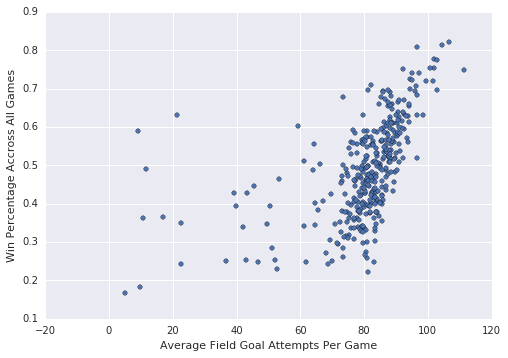

In [23]:
# seaprate out games won and lose and calculate fga
won_games_fga = won_games.sum()["Wfga"] + won_games.sum()["Wfta"]
lost_games_fga = lost_games.sum()["Lfga"] + lost_games.sum()["Lfta"]
field_goals = pd.DataFrame((won_games_fga + lost_games_fga) / total_games.count()["Wfga"])

# join this resulting DataFrame onto the win_percent DataFrame
joined_fg_wp = win_percent.join(field_goals, on="Team_Id")
joined_fg_wp.rename(columns={0: "Avg_FG_Attempts"}, inplace=True)

# plot the data
joined_fg_wp.plot(x="Avg_FG_Attempts", y="Total_Win_Percent", kind="scatter")
plt.xlabel("Average Field Goal Attempts Per Game")
plt.ylabel("Win Percentage Accross All Games");

The above correlation is very interesting. Although there are some outliers, the graph has somewhat of a correlation between the average number of field goal attempts per game and the win percentage of the team. The higher the average field goal attempts per game, the higher the total win percentage of the team.

## 3. Homefield Advantage
In this section we will examine our third question - Do teams who play games at home have an advantage over their opposing teams?

In [24]:
win_location = joined_game_data.groupby("Wloc").count()["Season"]

Extract the home games, away games, and netural games to separate variables. These variables represent the number of games that were won while the winning team was away, home, or in a neutral court.

In [25]:
away_games = win_location["A"]
home_games = win_location["H"]
neutral_games = win_location["N"]
total_games = away_games + home_games + neutral_games

In [26]:
assert (away_games + home_games + neutral_games) == (len(past_season_data) + len(past_tourney_data))

Lets calculate the percentages of winning teams that won while at home, away, and on a neutral court:

In [27]:
print("Winning Teams Win Away " + str(away_games / total_games * 100) + "% of the time")
print("Winning Teams Win Home " + str(home_games / total_games * 100) + "% of the time")
print("Winning Teams Win Neutral " + str(neutral_games / total_games * 100) + "% of the time")

Winning Teams Win Away 30.0708943479% of the time
Winning Teams Win Home 58.8872734903% of the time
Winning Teams Win Neutral 11.0418321618% of the time


This is a very unexpected outcome. One would think that the data would be very normal with 66,000 games. One would think that $\frac{1}{3}$ of the time teams would win Away, $\frac{1}{3}$ of the time teams would win at Home, and $\frac{1}{3}$ of the time teams would win on Neutral Courts. The above calculation shows that there is a significant correlation between playing as the home team and winning.

# Calculating Team Statistics
In this section I used the detailed data about regular season games to calculate important game data for each team for each season of basketball:

- Win Percentage
- Points Per Game (PPG)
- % Field Goals Made
- % Free Throws Made
- % 3 Pointers Made
- Offensive Rebounds Per Game
- Defensive Rebounds Per Game
- Assists Per Game
- Turnovers Per Game
- Steals Per Game
- Blocks Per Game
- Personal Fouls Per Game

## The NCAA Helper Script
The following import statement includes the functions necessary for this section. The **ncaa_helper** script includes all helper functions for calculating season data as well as individual game data and includes helper calculation functions for calculating the above team statistics. For more details about this file please reference the file named **ncaa_helper.py**.

In [28]:
import ncaa_helper as nh

## Plotting Team Data For Correlation Analysis
In this section we will use the combined seasonal averages for each team to show correlations between variables in a given season for all the teams. This correlation can be used to determine how one variable affects winning or even another variable.

Here is the function we will use to plot the data we will be analyzing per season:

In [29]:
def plot_year_data2(year, x_column, y_column):
    year_data = nh.beautify_columns(nh.calc_year_data(year, past_season_data, teams))
    sns.jointplot(x=x_column, y=y_column, data=year_data);

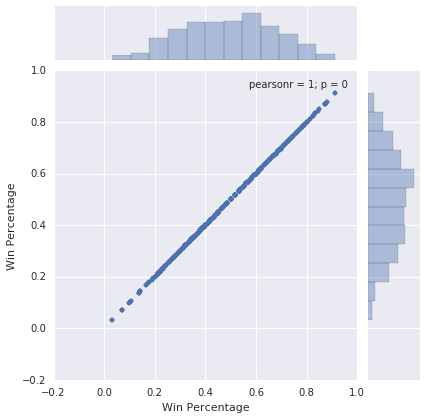

In [30]:
interact(plot_year_data2, year=(2003, 2015), x_column=nh.beautiful_columns, y_column=nh.beautiful_columns, __manual=True);

# Saving The Newly Calculated Data
Now that we can calculate season data for each team we can save this data as well as the data above for future use if needed in a pickle.

This function goes through each year and appends on the data to a DataFrame for storage:

In [31]:
def calc_all_team_data(years):
    data = pd.DataFrame()
    
    for year in years:
        data = data.append(nh.calc_year_data(year, past_season_data, teams))
    
    return data

In [32]:
years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

all_dat = calc_all_team_data(years)

In [33]:
all_dat.head()

,Team_Name,Season,wp,ppg,fgp,ftp,fgp3,or,dr,ast,to,stl,blk,pf
Team_Id,,,,,,,,,,,,,,
1102,Air Force,2003,0.428571,57.250000,0.481149,0.651357,0.375643,6.178571,16.000000,13.000000,11.428571,5.678571,1.785714,18.750000
1103,Akron,2003,0.481481,78.777778,0.486074,0.736390,0.338710,10.962963,20.000000,15.222222,12.629630,6.629630,2.333333,19.851852
1104,Alabama,2003,0.607143,69.285714,0.420362,0.709898,0.320144,15.035714,29.928571,12.107143,13.285714,7.535714,3.785714,18.035714
1105,Alabama A&M,2003,0.269231,71.769231,0.395755,0.705986,0.364815,7.461538,13.307692,14.538462,18.653846,4.961538,2.076923,20.230769
1106,Alabama St,2003,0.464286,63.607143,0.423773,0.646421,0.346154,11.250000,22.107143,11.678571,17.035714,8.392857,3.142857,18.178571


In [34]:
assert len(all_dat) == 4421
assert list(all_dat.columns) == ["Team_Name", "Season"] + nh.seasonal_columns
assert all_dat.index.name == "Team_Id"

Save all data to a pickle:

In [35]:
all_dat.to_pickle("calculated_past_team_seasonal_data")